In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt 

In [6]:
data = pd.read_excel("Customer+Churn+Data.xlsx")

In [7]:
data

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer


In [8]:
data.shape

(11260, 19)

In [9]:
data['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [11]:
data.describe(include="all")["Tenure"]

count     11158.0
unique       38.0
top           1.0
freq       1351.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Tenure, dtype: float64

In [12]:
data.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [13]:
import numpy as np  # Import numpy to use NaN

data["Tenure"] = data["Tenure"].apply(lambda x: str(x).replace("#", "0"))  # Convert to string before replacing
data["Tenure"] = data["Tenure"].apply(lambda x: str(x).replace("nan", "0"))

data["Tenure"] = data["Tenure"].astype("float")  # Convert to float after replacing
data.describe(include="all")["Tenure"]  # Get the description of the "Tenure" column

count     11260.000000
unique             NaN
top                NaN
freq               NaN
mean         10.811634
std          12.844640
min           0.000000
25%           2.000000
50%           8.000000
75%          16.000000
max          99.000000
Name: Tenure, dtype: float64

In [14]:
data["Tenure"].value_counts().sort_index()

Tenure
0.0     1449
1.0     1351
2.0      354
3.0      410
4.0      403
5.0      403
6.0      363
7.0      450
8.0      519
9.0      496
10.0     423
11.0     388
12.0     360
13.0     359
14.0     345
15.0     311
16.0     291
17.0     215
18.0     253
19.0     273
20.0     217
21.0     170
22.0     151
23.0     169
24.0     147
25.0     114
26.0     122
27.0     131
28.0     137
29.0     114
30.0     137
31.0      96
50.0       2
51.0       2
60.0       2
61.0       2
99.0     131
Name: count, dtype: int64

In [16]:
data.describe(include="all")["Churn"]

count     11260.000000
unique             NaN
top                NaN
freq               NaN
mean          0.168384
std           0.374223
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Churn, dtype: float64

In [17]:
data.Churn.unique()

array([1, 0])

In [18]:
import numpy as np  # Import numpy to use NaN

data["Churn"] = data["Churn"].apply(lambda x: str(x).replace("#", "0"))  # Convert to string before replacing
data["Churn"] = data["Churn"].apply(lambda x: str(x).replace("nan", "0"))

data["Churn"] = data["Churn"].astype("float")  # Convert to float after replacing
data.describe()["Churn"]  # Get the description of the "Tenure" column

count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64

In [19]:
data.Churn.unique()

array([1., 0.])

In [20]:
data["Churn"].value_counts().sort_index()

Churn
0.0    9364
1.0    1896
Name: count, dtype: int64

In [21]:
data.City_Tier.unique()

array([ 3.,  1., nan,  2.])

In [22]:
data.describe(include="all")["City_Tier"]

count     11148.000000
unique             NaN
top                NaN
freq               NaN
mean          1.653929
std           0.915015
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: City_Tier, dtype: float64

In [23]:
import numpy as np  # Import numpy to use NaN

data["City_Tier"] = data["City_Tier"].apply(lambda x: str(x).replace("#", "0"))  # Convert to string before replacing
data["City_Tier"] = data["City_Tier"].apply(lambda x: str(x).replace("nan", "0"))

data["City_Tier"] = data["City_Tier"].astype("float")  # Convert to float after replacing
data.describe(include="all")["City_Tier"]  # Get the description of the "Tenure" column

count     11260.000000
unique             NaN
top                NaN
freq               NaN
mean          1.637478
std           0.925130
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: City_Tier, dtype: float64

In [24]:
data.describe()["City_Tier"]

count    11260.000000
mean         1.637478
std          0.925130
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64

In [31]:
data.City_Tier.unique()

array([3., 1., 0., 2.])

In [35]:
data.CC_Contacted_LY.unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [46]:
import numpy as np  # Import numpy to use NaN

data["CC_Contacted_LY"] = data["CC_Contacted_LY"].apply(lambda x: str(x).replace("#", "0"))  # Convert to string before replacing
data["CC_Contacted_LY"] = data["CC_Contacted_LY"].apply(lambda x: str(x).replace("nan", "0"))

data["CC_Contacted_LY"] = data["CC_Contacted_LY"].astype("float")  # Convert to float after replacing
data.describe()["CC_Contacted_LY"]  # Get the description of the "Tenure" column

count    11260.000000
mean        17.705240
std          8.974194
min          0.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64

In [48]:
data.Payment.unique()             

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [50]:
data.describe(include="all")["Payment"]

count          11151
unique             5
top       Debit Card
freq            4587
mean             NaN
std              NaN
min              NaN
25%              NaN
50%              NaN
75%              NaN
max              NaN
Name: Payment, dtype: object

In [52]:
# Check if 'Payment' column exists in the DataFrame
if 'Payment' in data.columns:
    # Replace NaN values in the 'Payment' column with 0
    data['Payment'] = data['Payment'].fillna(0)
    # Retrieve the description for the 'Payment' column
    payment_description = data['Payment'].describe()
else:
    # If it does not exist, print a message
    payment_description = "Column 'Payment' does not exist in the DataFrame."

# Output the result
print(payment_description)

count          11260
unique             6
top       Debit Card
freq            4587
Name: Payment, dtype: object


In [54]:
data.Gender.unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [57]:
data.describe(include="all")["Gender"]

count     11152
unique        4
top        Male
freq       6328
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Gender, dtype: object

In [58]:
import numpy as np  # Import numpy to use NaN

data["Gender"] = data["Gender"].apply(lambda x: str(x).replace("Female", "F"))  # Convert to string before replacing

data["Gender"] = data["Gender"].astype("object")  # Convert to float after replacing
data.describe(include="all")["Gender"]  # Get the description of the "Tenure" column

count     11260
unique        4
top        Male
freq       6328
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Gender, dtype: object

In [60]:
import numpy as np  # Import numpy to use NaN

data["Gender"] = data["Gender"].apply(lambda x: str(x).replace("Male", "M"))  # Convert to string before replacing

data["Gender"] = data["Gender"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Gender"]  # Get the description of the "Gender" column

count     11260
unique        3
top           M
freq       6704
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Gender, dtype: object

In [62]:
import numpy as np  # Import numpy to use NaN

data["Gender"] = data["Gender"].apply(lambda x: str(x).replace("nan", "0"))  # Convert to string before replacing

data["Gender"] = data["Gender"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Gender"]  # Get the description of the "Gender" column

count     11260
unique        3
top           M
freq       6704
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Gender, dtype: object

In [64]:
data.Gender.unique()

array(['F', 'M', '0'], dtype=object)

In [66]:
data.Service_Score.unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [68]:
data.describe(include="all")["Service_Score"]

count     11162.000000
unique             NaN
top                NaN
freq               NaN
mean          2.902526
std           0.725584
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: Service_Score, dtype: float64

In [70]:
import numpy as np  # Import numpy to use NaN

data["Service_Score"] = data["Service_Score"].apply(lambda x: str(x).replace("nan", "0"))  # Convert to string before replacing

data["Service_Score"] = data["Service_Score"].astype("float")  # Convert to object after replacing
data.describe(include="all")["Service_Score"]  # Get the description of the "Gender" column

count     11260.000000
unique             NaN
top                NaN
freq               NaN
mean          2.877265
std           0.771090
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: Service_Score, dtype: float64

In [72]:
data.Service_Score.unique()

array([3., 2., 1., 0., 4., 5.])

In [74]:
data.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [76]:
data.describe(include="all")["Account_user_count"]

count     11148.0
unique        7.0
top           4.0
freq       4569.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Account_user_count, dtype: float64

In [78]:
import numpy as np  # Import numpy to use NaN

data["Account_user_count"] = data["Account_user_count"].apply(lambda x: str(x).replace("nan", "0"))# Convert to string before replacing
data["Account_user_count"] = data["Account_user_count"].apply(lambda x: str(x).replace("@", "0"))

data["Account_user_count"] = data["Account_user_count"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Account_user_count"]  # Get the description of the "Gender" column

count     11260
unique        7
top           4
freq       4569
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Account_user_count, dtype: object

In [81]:
data.Account_user_count.unique()

array(['3', '4', '0', '5', '2', '1', '6'], dtype=object)

In [83]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [84]:
data.describe(include="all")["account_segment"]

count     11163
unique        7
top       Super
freq       4062
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: account_segment, dtype: object

In [86]:
import numpy as np  # Import numpy to use NaN

data["account_segment"] = data["account_segment"].apply(lambda x: str(x).replace("+", "Plus"))# Convert to string before replacing
data["account_segment"] = data["account_segment"].apply(lambda x: str(x).replace("nan", "0"))

data["account_segment"] = data["account_segment"].astype("object")  # Convert to object after replacing
data.describe(include="all")["account_segment"]  # Get the description of the "Gender" column

count            11260
unique               6
top       Regular Plus
freq              4124
mean               NaN
std                NaN
min                NaN
25%                NaN
50%                NaN
75%                NaN
max                NaN
Name: account_segment, dtype: object

In [88]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', '0', 'Super Plus'],
      dtype=object)

In [90]:
data.CC_Agent_Score.unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [92]:
data.describe()["CC_Agent_Score"]

count    11144.000000
mean         3.066493
std          1.379772
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64

In [94]:
import numpy as np  # Import numpy to use NaN

data["CC_Agent_Score"] = data["CC_Agent_Score"].apply(lambda x: str(x).replace("nan", "0"))# Convert to string before replacing


data["CC_Agent_Score"] = data["CC_Agent_Score"].astype("float")  # Convert to object after replacing
data.describe()["CC_Agent_Score"]  # Get the description of the "Gender" column

count    11260.000000
mean         3.034902
std          1.407139
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64

In [96]:
data.CC_Agent_Score.unique()

array([2., 3., 5., 4., 0., 1.])

In [98]:
data.describe()["CC_Agent_Score"]

count    11260.000000
mean         3.034902
std          1.407139
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64

In [100]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [102]:
data.describe(include="all")["Marital_Status"]

count       11048
unique          3
top       Married
freq         5860
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Marital_Status, dtype: object

In [104]:
import numpy as np  # Import numpy to use NaN

data["Marital_Status"] = data["Marital_Status"].apply(lambda x: str(x).replace("nan", "0"))# Convert to string before replacing


data["Marital_Status"] = data["Marital_Status"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Marital_Status"]  # Get the description of the "Gender" column

count       11260
unique          4
top       Married
freq         5860
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Marital_Status, dtype: object

In [106]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married', '0'], dtype=object)

In [108]:
data.describe(include="all")["Marital_Status"]

count       11260
unique          4
top       Married
freq         5860
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Marital_Status, dtype: object

In [110]:
data.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [112]:
data.describe(include="all")["rev_per_month"]

count     11158.0
unique       59.0
top           3.0
freq       1746.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: rev_per_month, dtype: float64

In [114]:
import numpy as np  # Import numpy to use NaN

data["rev_per_month"] = data["rev_per_month"].apply(lambda x: str(x).replace("+", "0"))# Convert to string before replacing
data["rev_per_month"] = data["rev_per_month"].apply(lambda x: str(x).replace("nan", "0"))

data["rev_per_month"] = data["rev_per_month"].astype("object")  # Convert to object after replacing
data.describe(include="all")["rev_per_month"]  # Get the description of the "Gender" column

count     11260
unique       59
top           3
freq       1746
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: rev_per_month, dtype: object

In [116]:
data.rev_per_month.unique()

array(['9', '7', '6', '8', '3', '2', '4', '10', '1', '5', '0', '130',
       '19', '139', '102', '120', '138', '127', '123', '124', '116', '21',
       '126', '134', '113', '114', '108', '140', '133', '129', '107',
       '118', '11', '105', '20', '119', '121', '137', '110', '22', '101',
       '136', '125', '14', '13', '12', '115', '23', '122', '117', '131',
       '104', '15', '25', '135', '111', '109', '100', '103'], dtype=object)

In [118]:
data.Complain_ly.unique()

array([ 1.,  0., nan])

In [120]:
data["Complain_ly"].value_counts().sort_index()

Complain_ly
0.0    7792
1.0    3111
Name: count, dtype: int64

In [122]:
data.describe(include="all")["Complain_ly"]

count     10903.000000
unique             NaN
top                NaN
freq               NaN
mean          0.285334
std           0.451594
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Complain_ly, dtype: float64

In [124]:
data["rev_per_month"].value_counts().sort_index()

rev_per_month
0       791
1       402
10      413
100       1
101       3
102       8
103       1
104       1
105       2
107       5
108       3
109       1
11      278
110       3
111       1
113       3
114       2
115       3
116       3
117       3
118       4
119       3
12      166
120       2
121       2
122       1
123       5
124       5
125       2
126       3
127       3
129       4
13       93
130       3
131       2
133       4
134       2
135       1
136       4
137       3
138       3
139       2
14       48
140       4
15       24
19        2
2      1585
20        1
21        1
22        2
23        1
25        1
3      1746
4      1218
5      1337
6      1085
7       754
8       643
9       564
Name: count, dtype: int64

In [126]:
data["Complain_ly"].value_counts().sort_index()

Complain_ly
0.0    7792
1.0    3111
Name: count, dtype: int64

In [128]:
import numpy as np  # Import numpy to use NaN
# Convert to string before replacing
data["Complain_ly"] = data["Complain_ly"].apply(lambda x: str(x).replace("nan", "0.0"))

data["Complain_ly"] = data["Complain_ly"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Complain_ly"]  # Get the description of the "Gender" column

count     11260
unique        2
top         0.0
freq       8149
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Complain_ly, dtype: object

In [130]:
data["Complain_ly"].value_counts().sort_index()

Complain_ly
0.0    8149
1.0    3111
Name: count, dtype: int64

In [132]:
data["Complain_ly"].value_counts().sort_index()

Complain_ly
0.0    8149
1.0    3111
Name: count, dtype: int64

In [134]:
data.Complain_ly.unique()

array(['1.0', '0.0'], dtype=object)

In [136]:
data.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [138]:
data.describe(include="all")["rev_growth_yoy"]

count     11260.0
unique       20.0
top          14.0
freq       1524.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: rev_growth_yoy, dtype: float64

In [140]:
import numpy as np  # Import numpy to use NaN
# Convert to string before replacing
data["rev_growth_yoy"] = data["rev_growth_yoy"].apply(lambda x: str(x).replace("$", "0"))

data["rev_growth_yoy"] = data["rev_growth_yoy"].astype("object")  # Convert to object after replacing
data.describe(include="all")["rev_growth_yoy"]  # Get the description of the "Gender" column

count     11260
unique       20
top          14
freq       1524
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: rev_growth_yoy, dtype: object

In [142]:
data.rev_growth_yoy.unique()

array(['11', '15', '14', '23', '22', '16', '12', '13', '17', '18', '24',
       '19', '20', '21', '25', '26', '0', '4', '27', '28'], dtype=object)

In [144]:
data["rev_growth_yoy"].value_counts().sort_index()

rev_growth_yoy
0        3
11     523
12    1210
13    1427
14    1524
15    1283
16     949
17     704
18     708
19     619
20     562
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
4        3
Name: count, dtype: int64

In [146]:
data.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [148]:
data.describe(include="all")['coupon_used_for_payment']

count     11260.0
unique       20.0
top           1.0
freq       4373.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: coupon_used_for_payment, dtype: float64

In [150]:

# Convert to string before replacing
data["coupon_used_for_payment"] = data["coupon_used_for_payment"].apply(lambda x: str(x).replace("$", "0"))
data["coupon_used_for_payment"] = data["coupon_used_for_payment"].apply(lambda x: str(x).replace("#", "0"))
data["coupon_used_for_payment"] = data["coupon_used_for_payment"].apply(lambda x: str(x).replace("*", "0"))

data["coupon_used_for_payment"] = data["coupon_used_for_payment"].astype("object")  # Convert to object after replacing
data.describe(include="all")["coupon_used_for_payment"]  # Get the description of the "Gender" column

count     11260
unique       17
top           1
freq       4373
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: coupon_used_for_payment, dtype: object

In [152]:
data.coupon_used_for_payment.unique()

array(['1', '0', '4', '2', '9', '6', '11', '7', '12', '10', '5', '3',
       '13', '15', '8', '14', '16'], dtype=object)

In [154]:
data["coupon_used_for_payment"].value_counts().sort_index()

coupon_used_for_payment
0     2153
1     4373
10      34
11      30
12      26
13      22
14      12
15       4
16       4
2     2656
3      698
4      424
5      284
6      234
7      184
8       88
9       34
Name: count, dtype: int64

In [156]:
data.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [158]:
data.describe(include="all")['Day_Since_CC_connect']

count     10903.0
unique       24.0
top           3.0
freq       1816.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Day_Since_CC_connect, dtype: float64

In [160]:

# Convert to string before replacing
data["Day_Since_CC_connect"] = data["Day_Since_CC_connect"].apply(lambda x: str(x).replace("nan", "0"))
data["Day_Since_CC_connect"] = data["Day_Since_CC_connect"].apply(lambda x: str(x).replace("$", "0"))


data["Day_Since_CC_connect"] = data["Day_Since_CC_connect"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Day_Since_CC_connect"]  # Get the description of the "Gender" column

count     11260
unique       23
top           3
freq       1816
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Day_Since_CC_connect, dtype: object

In [162]:
data["Day_Since_CC_connect"].value_counts().sort_index()

Day_Since_CC_connect
0     1322
1     1256
10     339
11     183
12     146
13     117
14      74
15      37
16      26
17      34
18      26
2     1574
3     1816
30       2
31       2
4      893
46       1
47       2
5      479
6      229
7      911
8     1169
9      622
Name: count, dtype: int64

In [164]:
data.Day_Since_CC_connect.unique()

array(['5', '0', '3', '7', '2', '1', '8', '6', '4', '15', '11', '10', '9',
       '13', '12', '17', '16', '14', '30', '46', '18', '31', '47'],
      dtype=object)

In [166]:
data.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [168]:
data.describe(include="all")['cashback']

count     10789.00
unique     5693.00
top         155.62
freq         10.00
mean           NaN
std            NaN
min            NaN
25%            NaN
50%            NaN
75%            NaN
max            NaN
Name: cashback, dtype: float64

In [171]:

# Convert to string before replacing
data["cashback"] = data["cashback"].apply(lambda x: str(x).replace("nan", "0"))
data["cashback"] = data["cashback"].apply(lambda x: str(x).replace("$", "0"))


data["cashback"] = data["cashback"].astype("object")  # Convert to object after replacing
data.describe(include="all")["cashback"]  # Get the description of the "Gender" column

count     11260
unique     5692
top           0
freq        477
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: cashback, dtype: object

In [172]:
data["cashback"].value_counts().sort_index()

cashback
0                     477
110.09                  2
110.50999999999999      2
110.52000000000001      2
110.81                  3
                     ... 
41                      1
5                       1
56                      1
57                      1
81                      2
Name: count, Length: 5692, dtype: int64

In [174]:
data.cashback.unique()

array(['159.93', '120.9', '0', ..., '227.36', '226.91', '191.42'],
      dtype=object)

In [176]:
data.Login_device.unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [178]:
data.describe(include="all")['Login_device']

count      11039
unique         3
top       Mobile
freq        7482
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: Login_device, dtype: object

In [180]:
data["Login_device"].value_counts().sort_index()

Login_device
&&&&         539
Computer    3018
Mobile      7482
Name: count, dtype: int64

In [182]:

# Convert to string before replacing
data["Login_device"] = data["Login_device"].apply(lambda x: str(x).replace("&&&&", "Tab"))
data["Login_device"] = data["Login_device"].apply(lambda x: str(x).replace("nan", "Mobile"))


data["Login_device"] = data["Login_device"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Login_device"]  # Get the description of the "Gender" column

count      11260
unique         3
top       Mobile
freq        7703
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: Login_device, dtype: object

In [184]:
data["Login_device"].value_counts().sort_index()

Login_device
Computer    3018
Mobile      7703
Tab          539
Name: count, dtype: int64

In [186]:
data_na = data.isna().sum()
data_na[data_na.values>0].sort_values(ascending=False)

Series([], dtype: int64)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


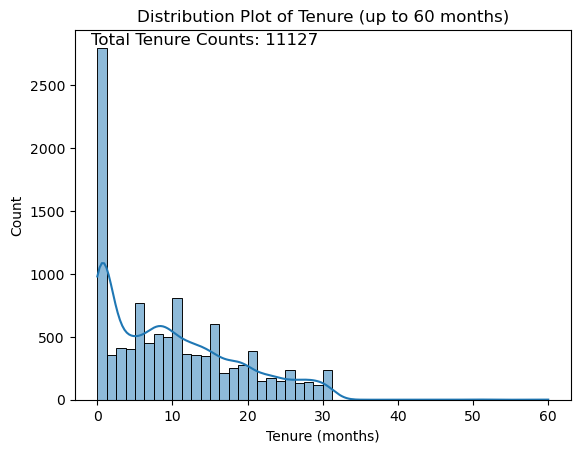

In [188]:
# Univariate Analysis
# Continous Variables 
# Univariate Analysis
# Continuous Variables 
import seaborn as sns  # Corrected the module name from 'seanborn' to 'seaborn'
import matplotlib.pyplot as plt  # Importing matplotlib for plt to work

# Assuming 'data' is a DataFrame that contains a 'Tenure' column
# Filter the data to include only tenure up to 60 months
filtered_data = data[data['Tenure'] <= 60]

# Create the histogram with KDE
sns.histplot(filtered_data['Tenure'], kde=True)  # Use the filtered data for the histogram
plt.title('Distribution Plot of Tenure (up to 60 months)')
plt.xlabel('Tenure (months)')

# Calculate and display the total count of tenures
total_count = filtered_data['Tenure'].count()  # Count the number of entries in the filtered data
plt.figtext(0.15, 0.85, f'Total Tenure Counts: {total_count}', fontsize=12)  # Display total count on the plot

plt.show()

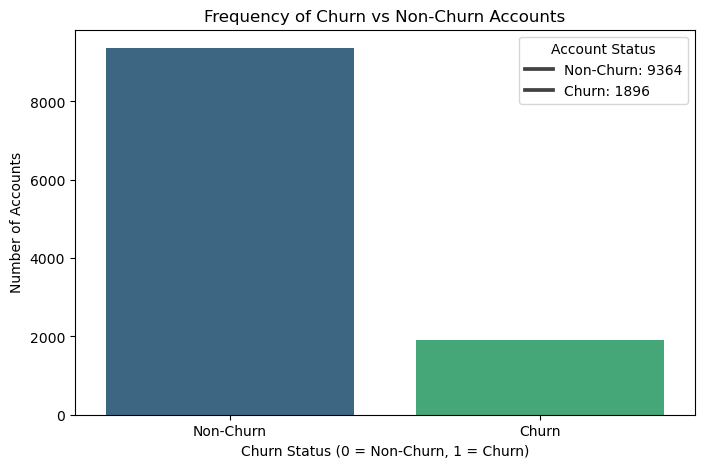

In [190]:
# Assuming 'data' is a DataFrame that contains a 'Churn' column
# where 'Churn' is a binary variable (1 for churn, 0 for non-churn)

# Assuming 'data' is a DataFrame that contains a 'Churn' column
# where 'Churn' is a binary variable (1 for churn, 0 for non-churn)

# Assuming 'data' is a DataFrame that contains a 'Churn' column
# where 'Churn' is a binary variable (1 for churn, 0 for non-churn)

import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of churn vs non-churn accounts
churn_counts = data['Churn'].value_counts()  # Count occurrences of each category

# Create a bar plot to visualize the churn vs non-churn accounts
plt.figure(figsize=(8, 5))  # Set the figure size
bar_plot = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')  # Create the bar plot
plt.title('Frequency of Churn vs Non-Churn Accounts')
plt.xlabel('Churn Status (0 = Non-Churn, 1 = Churn)')
plt.ylabel('Number of Accounts')
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])  # Set x-tick labels

# Prepare legend text with total counts
non_churn_count = churn_counts[0]  # Total non-churn accounts
churn_count = churn_counts[1]  # Total churn accounts
legend_text = [f'Non-Churn: {non_churn_count}', f'Churn: {churn_count}']

# Adding legend with total counts
plt.legend(legend_text, title='Account Status', loc='upper right')  # Add legend with counts

plt.show()

Mean Tenure: 10.81 months
Median Tenure: 8.00 months
Mode Tenure: 0.00 months


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


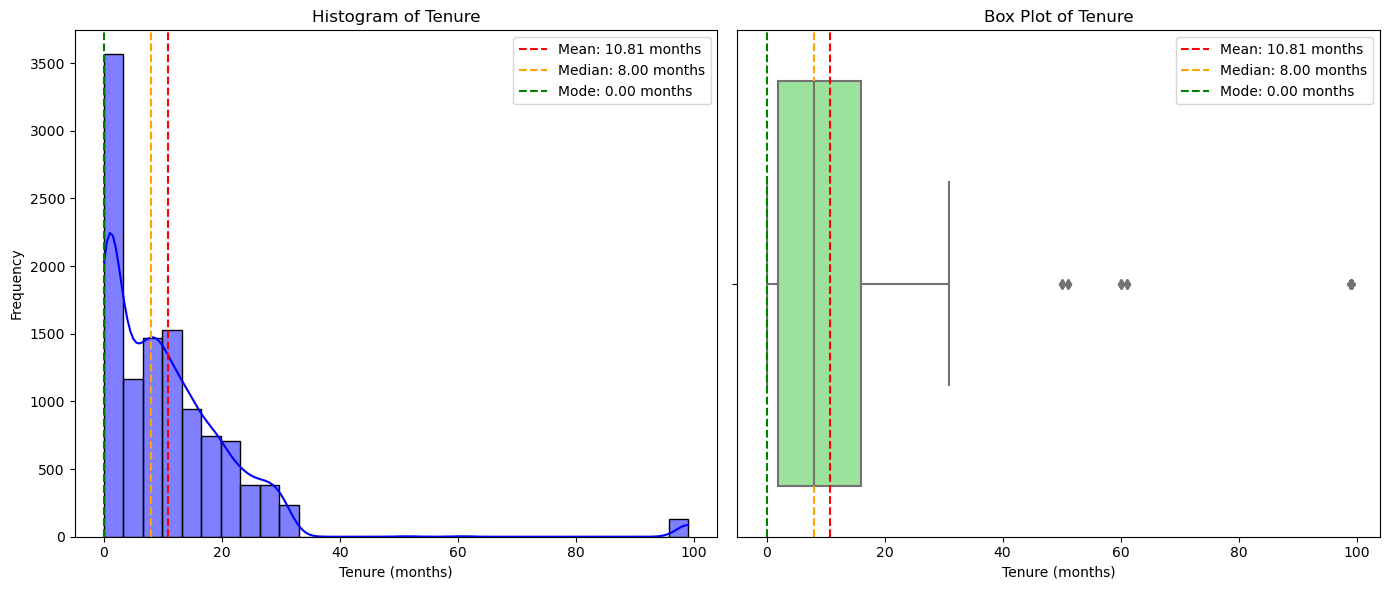

In [191]:
# Assuming 'data' is a DataFrame that contains a 'Tenure' column

# Assuming 'data' is a DataFrame that contains a 'Tenure' column

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Calculate descriptive statistics
mean_tenure = data['Tenure'].mean()  # Mean
median_tenure = data['Tenure'].median()  # Median
mode_tenure = data['Tenure'].mode()[0]  # Mode (taking the first mode if there are multiple)

# Print the descriptive statistics
print(f"Mean Tenure: {mean_tenure:.2f} months")
print(f"Median Tenure: {median_tenure:.2f} months")
print(f"Mode Tenure: {mode_tenure:.2f} months")

# Create a figure for the plots
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Tenure'], kde=True, color='blue', bins=30)  # Histogram with KDE
plt.title('Histogram of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

# Adding legend for the histogram
plt.axvline(mean_tenure, color='red', linestyle='--', label=f'Mean: {mean_tenure:.2f} months')  # Mean line
plt.axvline(median_tenure, color='orange', linestyle='--', label=f'Median: {median_tenure:.2f} months')  # Median line
plt.axvline(mode_tenure, color='green', linestyle='--', label=f'Mode: {mode_tenure:.2f} months')  # Mode line
plt.legend()  # Show legend

# Box Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=data['Tenure'], color='lightgreen')  # Box plot
plt.title('Box Plot of Tenure')
plt.xlabel('Tenure (months)')

# Adding legend for the box plot
plt.axvline(mean_tenure, color='red', linestyle='--', label=f'Mean: {mean_tenure:.2f} months')  # Mean line
plt.axvline(median_tenure, color='orange', linestyle='--', label=f'Median: {median_tenure:.2f} months')  # Median line
plt.axvline(mode_tenure, color='green', linestyle='--', label=f'Mode: {mode_tenure:.2f} months')  # Mode line
plt.legend()  # Show legend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

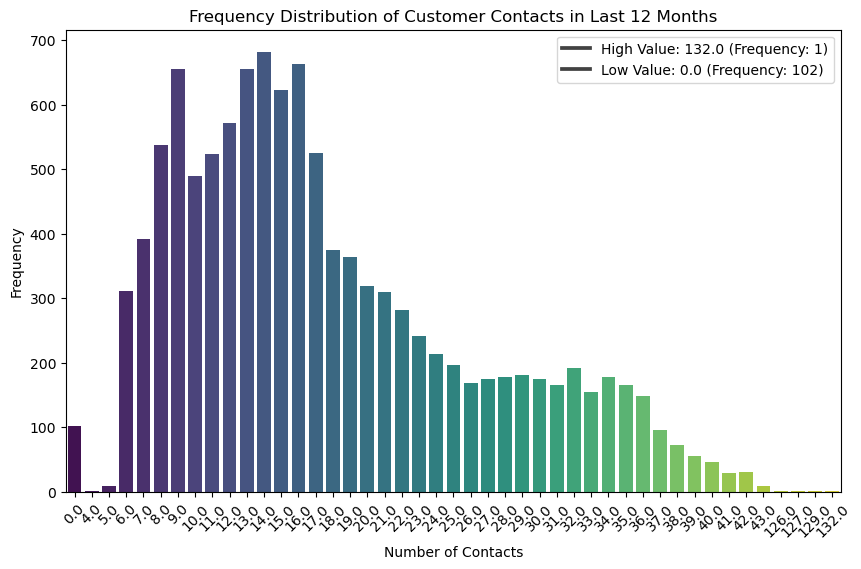

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data and CC_Contacted_LY is the relevant column
# Create a frequency distribution
frequency_distribution = data['CC_Contacted_LY'].value_counts().sort_index()

# Calculate high and low values and their frequencies
high_value = frequency_distribution.index.max()
low_value = frequency_distribution.index.min()
high_value_freq = frequency_distribution[high_value]
low_value_freq = frequency_distribution[low_value]

# Plotting the frequency distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')
plt.title('Frequency Distribution of Customer Contacts in Last 12 Months')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding high and low values with their frequencies to the legend
plt.legend([f'High Value: {high_value} (Frequency: {high_value_freq})', 
            f'Low Value: {low_value} (Frequency: {low_value_freq})'], loc='upper right')

plt.show()

Descriptive Statistics of Service Satisfaction Scores (0-5):
count    11260.000000
mean         2.877265
std          0.771090
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


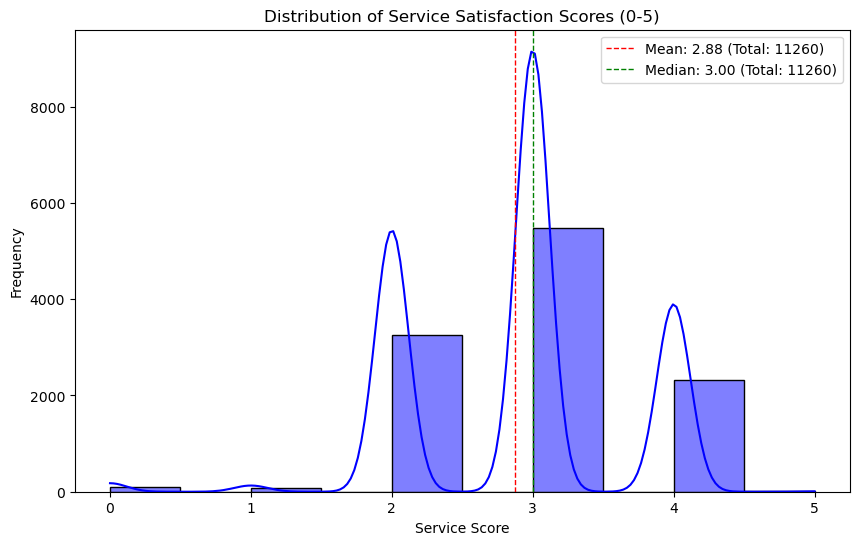

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Service_Score' column

# Step 1: Filter the DataFrame for Service_Score in the range 0-5
filtered_data = data[(data['Service_Score'] >= 0) & (data['Service_Score'] <= 5)]

# Step 2: Calculate descriptive statistics for Service_Score
descriptive_stats = filtered_data['Service_Score'].describe()

# Print descriptive statistics including total frequency
print("Descriptive Statistics of Service Satisfaction Scores (0-5):")
print(descriptive_stats)
total_frequency = len(filtered_data)  # Total number of observations

# Step 3: Visualizing the distribution of service scores
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Service_Score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Service Satisfaction Scores (0-5)')
plt.xlabel('Service Score')
plt.ylabel('Frequency')

# Update legend labels to include total frequency
plt.axvline(descriptive_stats['mean'], color='red', linestyle='dashed', linewidth=1, 
            label=f'Mean: {descriptive_stats["mean"]:.2f} (Total: {total_frequency})')
plt.axvline(descriptive_stats['50%'], color='green', linestyle='dashed', linewidth=1, 
            label=f'Median: {descriptive_stats["50%"]:.2f} (Total: {total_frequency})')  # Median

plt.legend()
plt.show()

# Note: Removed trend analysis since there is no 'Date' column

Descriptive Statistics of Customer Care Satisfaction Scores (0-5):
count    11260.000000
mean         3.034902
std          1.407139
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


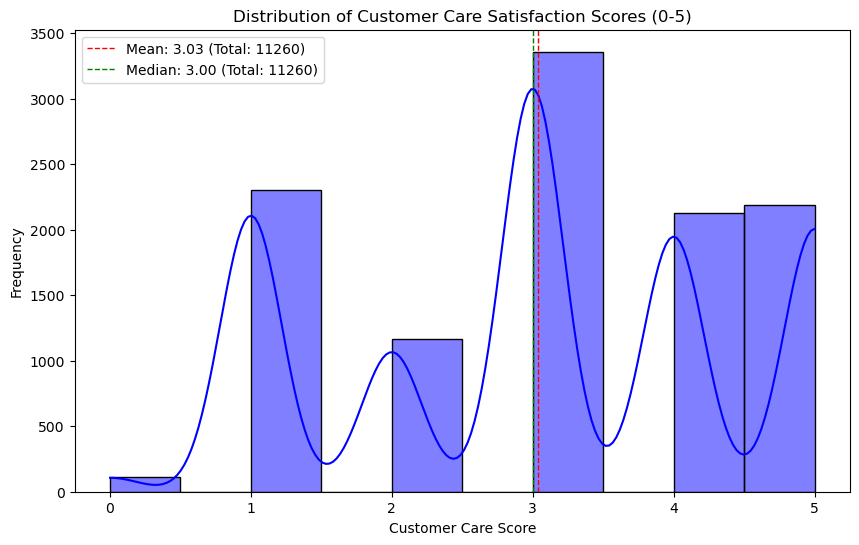

In [196]:


# Assuming 'data' is your DataFrame containing the 'CC_Agent_Score' column

# Step 1: Filter the DataFrame for CC_Agent_Score in the range 0-5 (if applicable)
filtered_data = data[(data['CC_Agent_Score'] >= 0) & (data['CC_Agent_Score'] <= 5)]

# Step 2: Calculate descriptive statistics for CC_Agent_Score
descriptive_stats = filtered_data['CC_Agent_Score'].describe()

# Print descriptive statistics including total frequency
print("Descriptive Statistics of Customer Care Satisfaction Scores (0-5):")
print(descriptive_stats)
total_frequency = len(filtered_data)  # Total number of observations

# Step 3: Visualizing the distribution of customer care scores
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['CC_Agent_Score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Customer Care Satisfaction Scores (0-5)')
plt.xlabel('Customer Care Score')
plt.ylabel('Frequency')

# Update legend labels to include total frequency
plt.axvline(descriptive_stats['mean'], color='red', linestyle='dashed', linewidth=1, 
            label=f'Mean: {descriptive_stats["mean"]:.2f} (Total: {total_frequency})')
plt.axvline(descriptive_stats['50%'], color='green', linestyle='dashed', linewidth=1, 
            label=f'Median: {descriptive_stats["50%"]:.2f} (Total: {total_frequency})')  # Median

plt.legend()
plt.show()

# Note: Removed trend analysis since there is no 'Date' column

Total Complaints Raised in the Last 12 Months: 3111.0
Average Complaints per Customer: 0.28


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


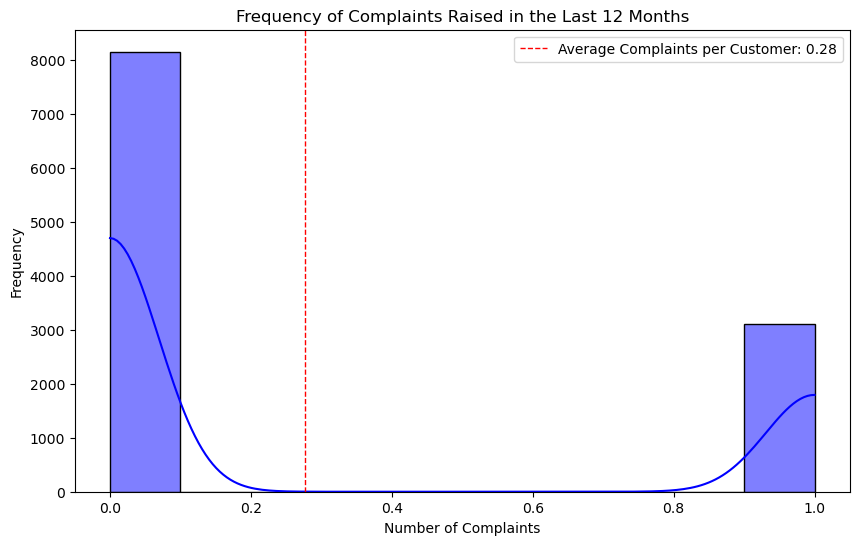

In [198]:


# Assuming 'data' is your DataFrame containing the 'Complain_ly' column

# Step 1: Convert 'Complain_ly' to numeric, forcing errors to NaN
data['Complain_ly'] = pd.to_numeric(data['Complain_ly'], errors='coerce')

# Calculate total complaints and average complaints per customer
total_complaints = data['Complain_ly'].sum()  # Total number of complaints
total_customers = len(data)  # Total number of customers
average_complaints_per_customer = total_complaints / total_customers if total_customers > 0 else 0  # Average complaints per customer

# Print the results
print(f"Total Complaints Raised in the Last 12 Months: {total_complaints}")
print(f"Average Complaints per Customer: {average_complaints_per_customer:.2f}")

# Step 2: Visualizing the frequency of complaints
plt.figure(figsize=(10, 6))
sns.histplot(data['Complain_ly'], bins=10, kde=True, color='blue')
plt.title('Frequency of Complaints Raised in the Last 12 Months')
plt.xlabel('Number of Complaints')
plt.ylabel('Frequency')

# Add vertical line for average complaints per customer
plt.axvline(average_complaints_per_customer, color='red', linestyle='dashed', linewidth=1, 
            label=f'Average Complaints per Customer: {average_complaints_per_customer:.2f}')

plt.legend()
plt.show()

Total Complaints Raised in the Last 12 Months: 3111.0


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


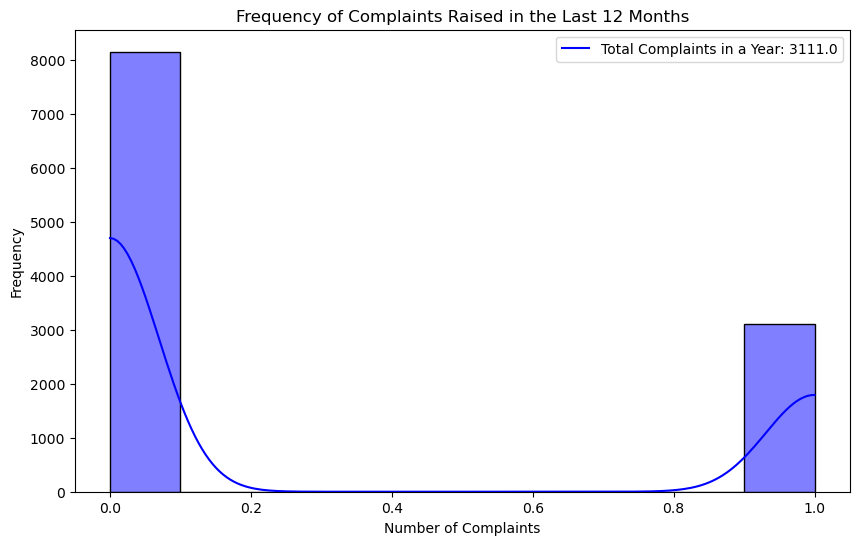

In [200]:

# Assuming 'data' is your DataFrame containing the 'Complain_ly' column

# Step 1: Convert 'Complain_ly' to numeric, forcing errors to NaN
data['Complain_ly'] = pd.to_numeric(data['Complain_ly'], errors='coerce')

# Calculate total complaints
total_complaints = data['Complain_ly'].sum()  # Total number of complaints

# Print the results
print(f"Total Complaints Raised in the Last 12 Months: {total_complaints}")

# Step 2: Visualizing the frequency of complaints
plt.figure(figsize=(10, 6))
sns.histplot(data['Complain_ly'], bins=10, kde=True, color='blue')
plt.title('Frequency of Complaints Raised in the Last 12 Months')
plt.xlabel('Number of Complaints')
plt.ylabel('Frequency')
plt.legend([f'Total Complaints in a Year: {total_complaints}'])
plt.show()

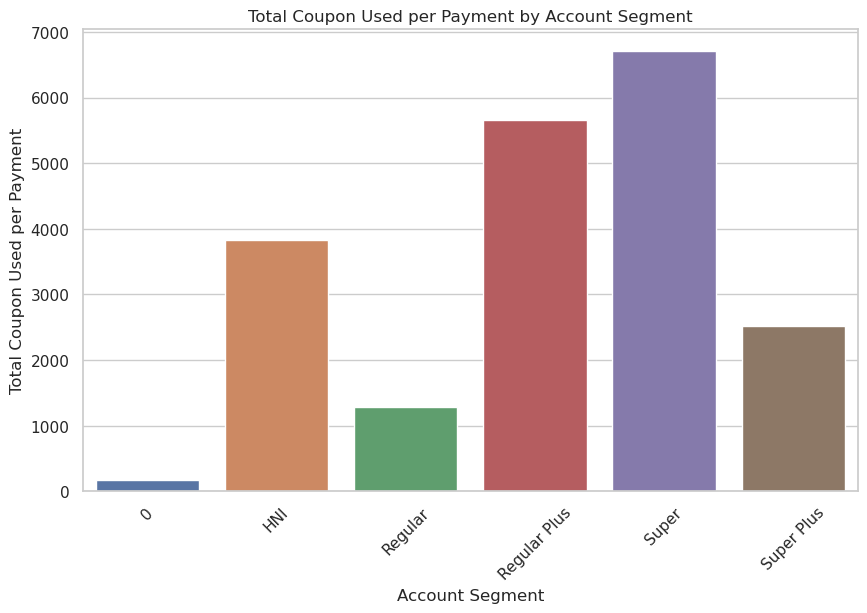

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Convert 'coupon_used_for_payment' to numeric, forcing errors to NaN
data['coupon_used_for_payment'] = pd.to_numeric(data['coupon_used_for_payment'], errors='coerce')

# Group by account_segment and calculate the total of coupon_used_for_payment
coupon_usage = data.groupby('account_segment')['coupon_used_for_payment'].sum().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='account_segment', y='coupon_used_for_payment', data=coupon_usage)
plt.title('Total Coupon Used per Payment by Account Segment')
plt.xlabel('Account Segment')
plt.ylabel('Total Coupon Used per Payment')
plt.xticks(rotation=45)
plt.show()

Average Days Since Last Contact: 4.49


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


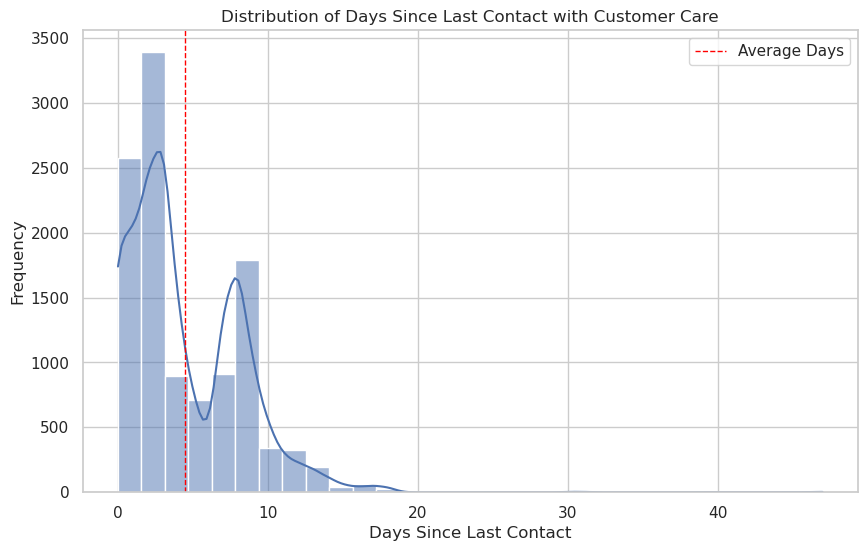

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Day_Since_CC_connect' column
# data = pd.read_csv('your_data_file.csv')  # Load your data

# Calculate the average days since last contact
average_days = data['Day_Since_CC_connect'].mean()
print(f'Average Days Since Last Contact: {average_days:.2f}')

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Day_Since_CC_connect'], bins=30, kde=True)
plt.title('Distribution of Days Since Last Contact with Customer Care')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Frequency')
plt.axvline(average_days, color='red', linestyle='dashed', linewidth=1, label='Average Days')
plt.legend()
plt.show()